# HOUSE PRICE PREDICTION

## Overview

### Welcome to the House Price Prediction model!

This project utilizes a Linear Regression algorithm to predict house prices based on various features, including the number of bedrooms, bathrooms, sqft living, sqft lot, floors, waterfront, view, square footage, and many more. 🏠📈 The model has undergone extensive Exploratory Data Analysis (EDA) and feature engineering to enhance its predictive performance. 🛠️✨

## Problem Statement

Predicting house prices is a crucial task in real estate and finance. 🏡💰 This model addresses this challenge by analyzing a comprehensive dataset, extracting meaningful features, and employing a Linear Regression algorithm to establish a reliable pricing model. 📊✨

## Use Case Solved

Our project nailed the task of forecasting house prices. This model isn't just a bunch of code; it's a handy tool for:

1.🏡 Buyers: Giving them the lowdown on fair market values, so they can shop smarter.

2.💰 Sellers: Helping them set the perfect price tag for their homes to attract the best market buzz.

3.📊 Real Estate Pros: Handing them a data-powered compass to guide clients and supercharge property listings. We're turning data into real estate gold! 🚀

## Algorithm

The backbone of our model is the Linear Regression algorithm – a superhero in the data science world! It's like the detective of algorithms, investigating the connections between features and making predictions about house prices. We've trained and tested it tirelessly. It's basically the MVP of predicting house prices! 🚀✨

### Here , I am Starting a house price prediction project ! 🏡 Exploring features and improving predictions through data analysis. 📊✨

#### Here, we import the necessary python libraries for data preprocessing and visualisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("kc_house_data.csv",parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Here, I am trying to get a sense of the features in the dataset, their datatypes, and a brief summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Here, I aim to learn about the target variable. I gather a basic description along with its skewness which gives me an idea of how it is distributed

<Axes: xlabel='price', ylabel='Density'>

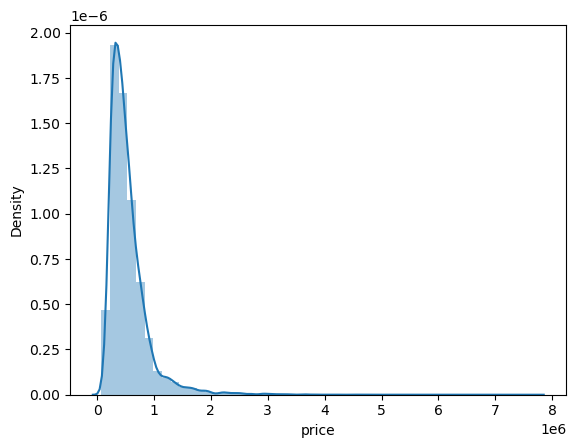

In [6]:
sns.distplot(df['price'])

In [7]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.024069
Kurtosis: 34.585540


#### This is a correlation heatmap that helps me points out to me the variables that are highly correlated to each other so I could remove them later on to avoid multicollinearity

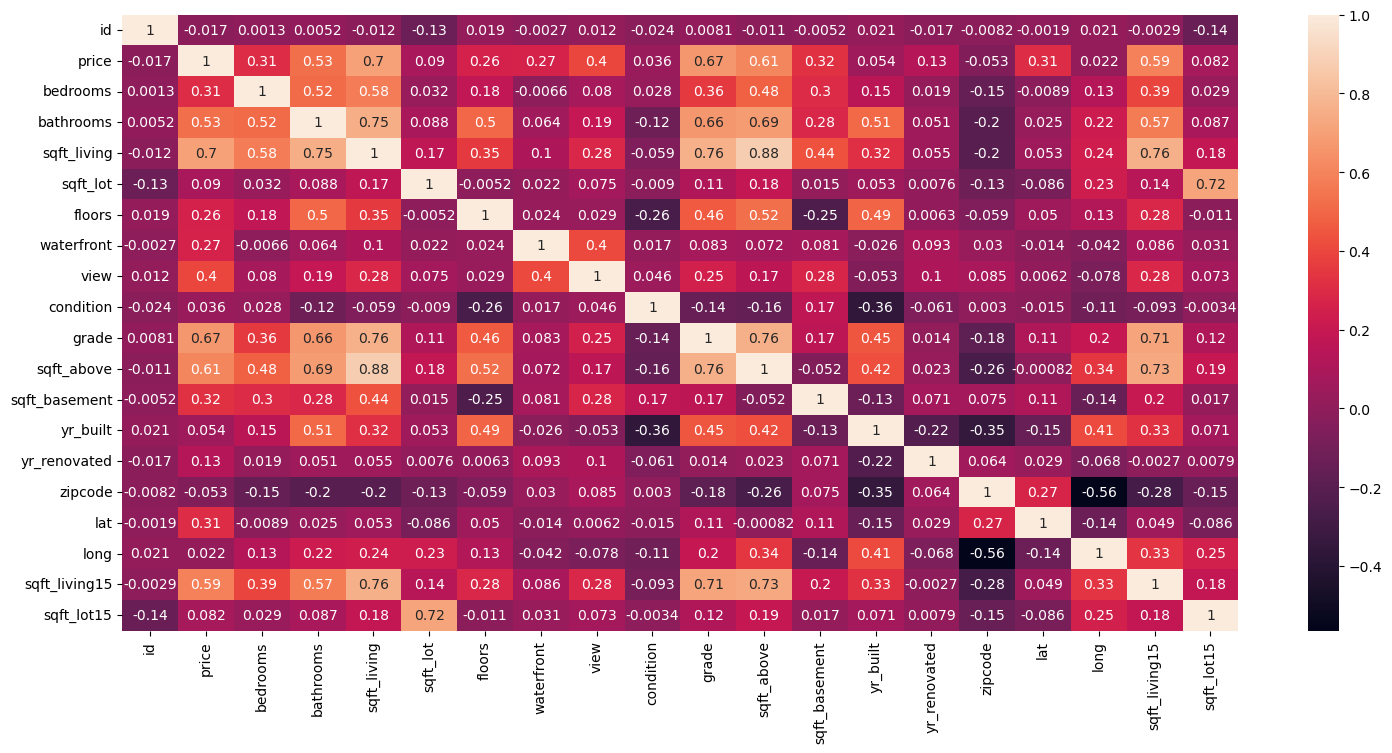

In [8]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### I would like to drop some variables which are not too important for us

In [9]:
df=df.drop(['id','date','grade','zipcode','yr_renovated'],axis='columns')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,47.6168,-122.045,1800,7503


#### Checling for null Values,expressed as a percentage of the total number of rows

In [10]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
condition,0,0.0
sqft_above,0,0.0


#### Now, I want to normalize the variable with a skewed distribution.

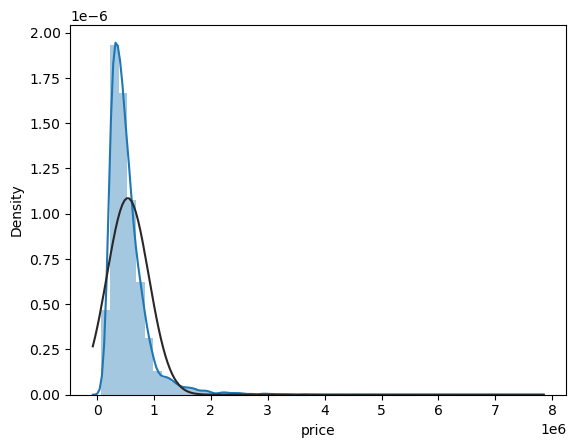

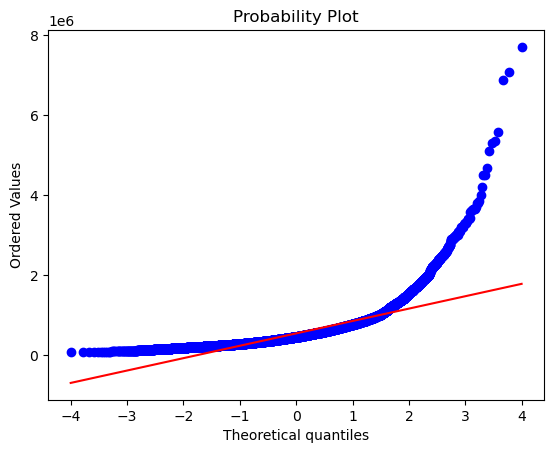

In [11]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [12]:
df['price'] = np.log(df['price'])

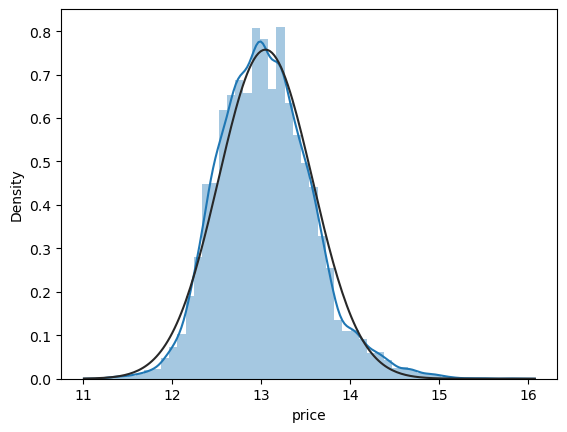

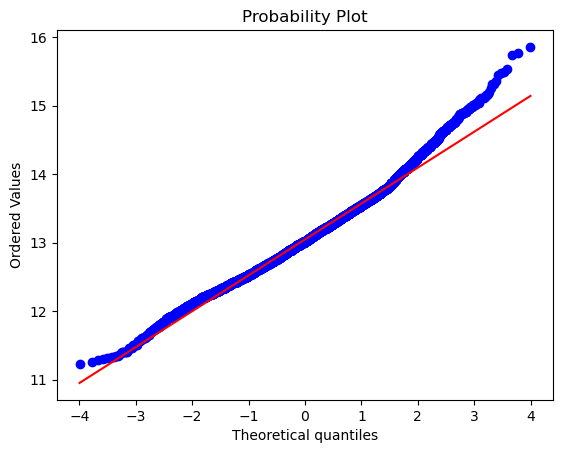

In [13]:
sns.distplot(df['price'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

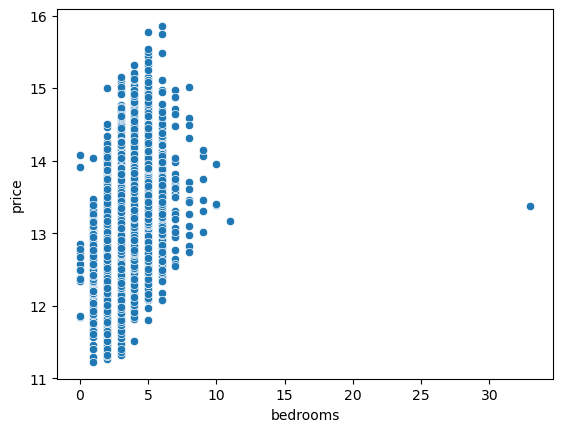

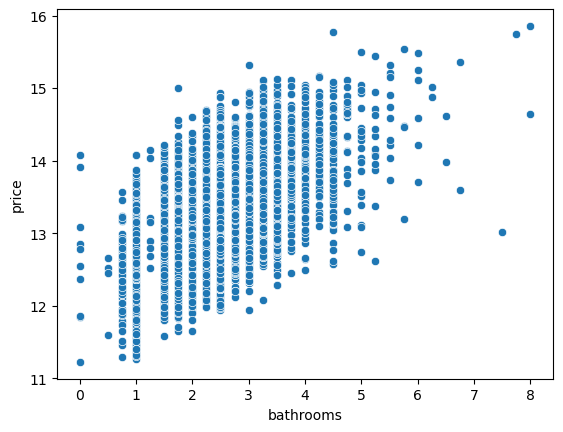

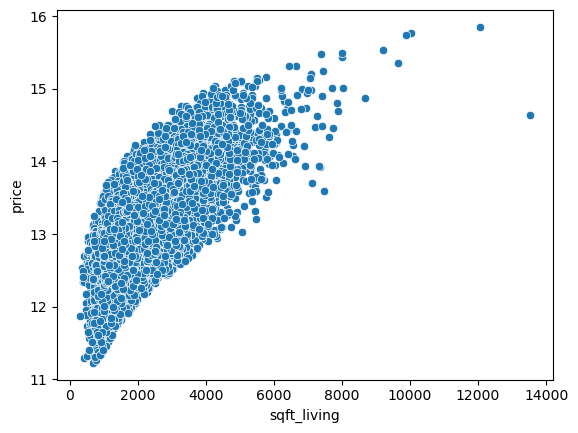

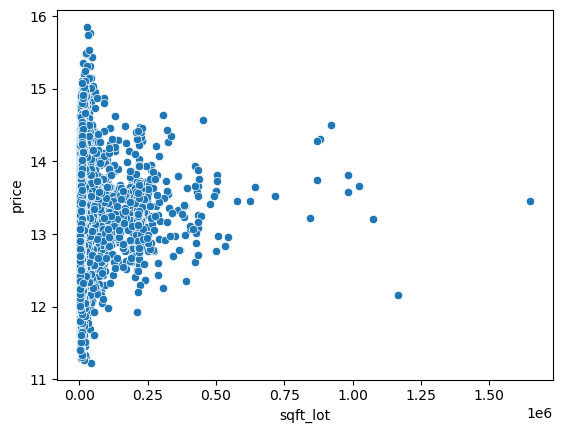

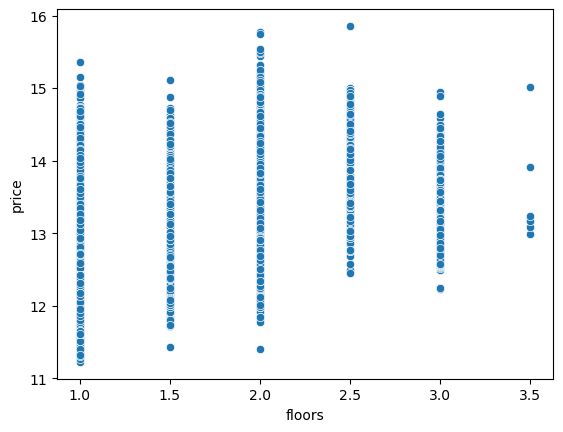

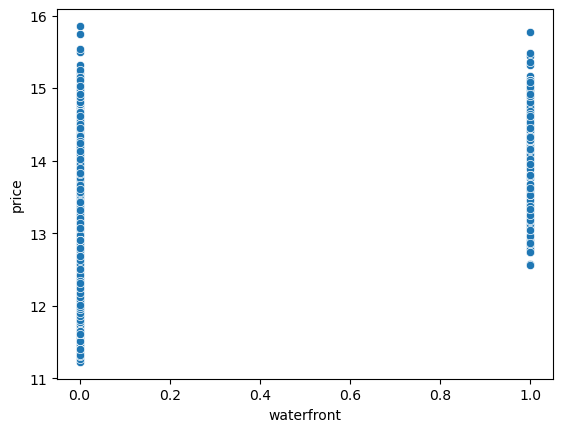

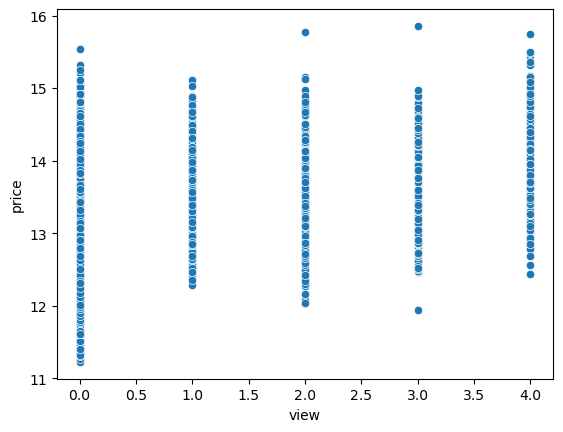

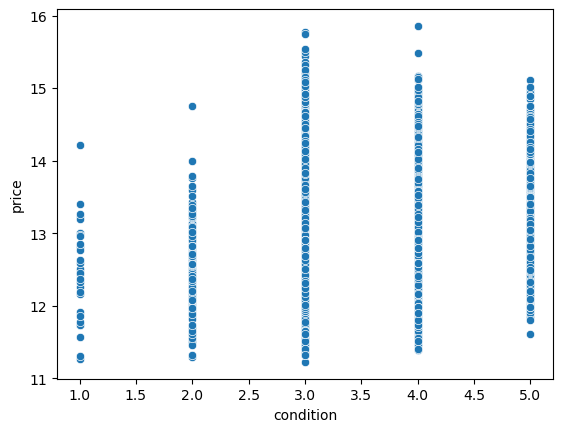

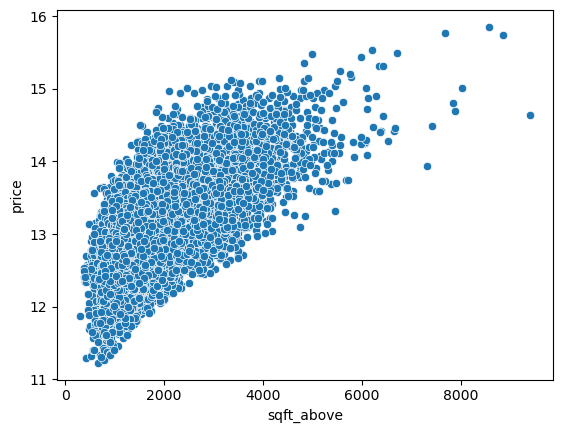

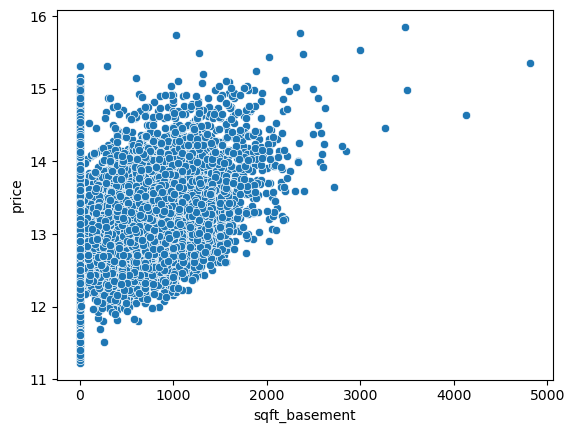

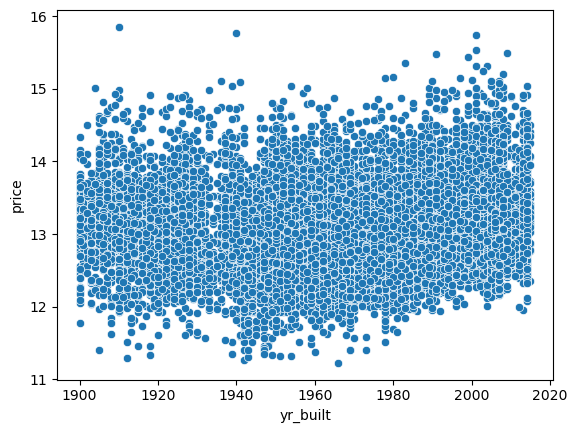

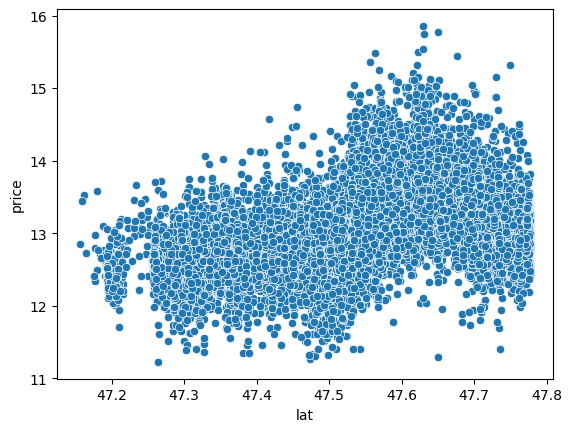

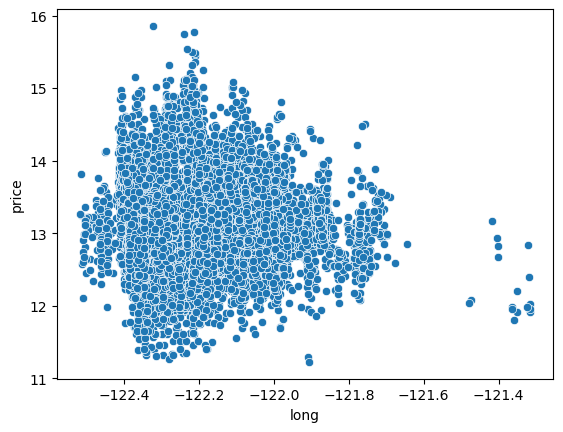

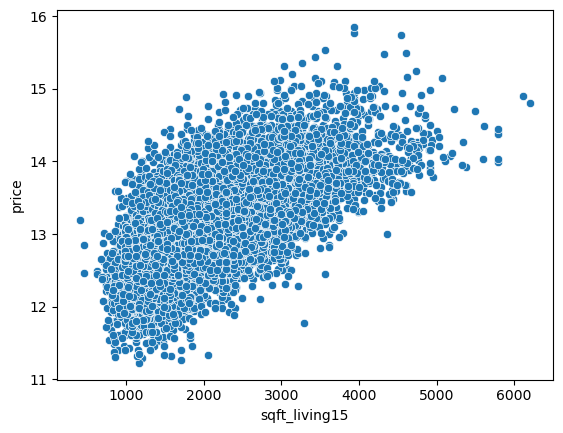

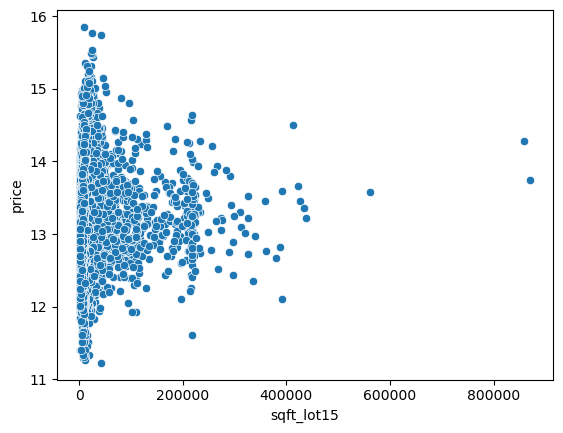

In [14]:
for variable in df.columns:
    if variable != 'price':
        sns.scatterplot(x=variable, y = 'price', data=df)
        plt.show()

In [15]:
df = df[df['bedrooms'] < 11]

In [16]:
df = df[df['sqft_living'] < 12000]

In [17]:
df = df[df['sqft_lot15'] < 500000]

In [18]:
df = df[df['long'] < -121.6]

In [19]:
df = df[df['sqft_basement'] < 3500]

In [20]:
df = df[df['sqft_lot'] < 1000000]

#### Now, I begin to create the model. I first split my dataset into the train and the test sets. I also separate the 'x' (the independent variables) from the 'y' (the dependent/target variable).

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop(['price'],axis=1)
y=df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### I construct a Multiple Linear Regression model using the training data and then fit it on the test data. I also print the MSE, MAE, and the R^2 as evaluation metrics.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
model=LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 0.07580266135722306
Mean Absolute Error (MAE): 0.21279577107993658
Coefficient of Determination (R^2): 0.7342957287478931


#### An R^2 of 0.73 tells me that the model could have been better. Maybe I did not treat the variables as well as I could have in the preprocessing phase, or maybe the choice of a multiple regression model was a wrong one. Nevertheless, the output could have also been lower. My model has been able to succesfully explain and predict 73% of the variability in the Sales Price 

#### I end my project with a scatter plot of each data point in the actual 'price' column against each data point in my Predicted 'price' column.

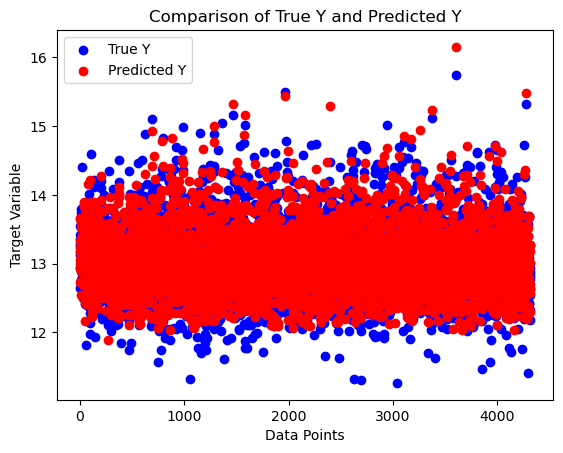

In [26]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Y')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Y')

plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Comparison of True Y and Predicted Y')
plt.legend()

plt.show()

### Here, I conclude my house price prediction project journey. 🏁🏡 Throughout, I've harnessed the power of Linear Regression, delving into features and refining predictions. 🌟📊